In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../datasets/Cust_Spend_Data.csv')
data

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [5]:
data_Attr = data.iloc[:,2:]
data_Attr.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [7]:
dataScaled = data_Attr.apply(zscore)
dataScaled

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


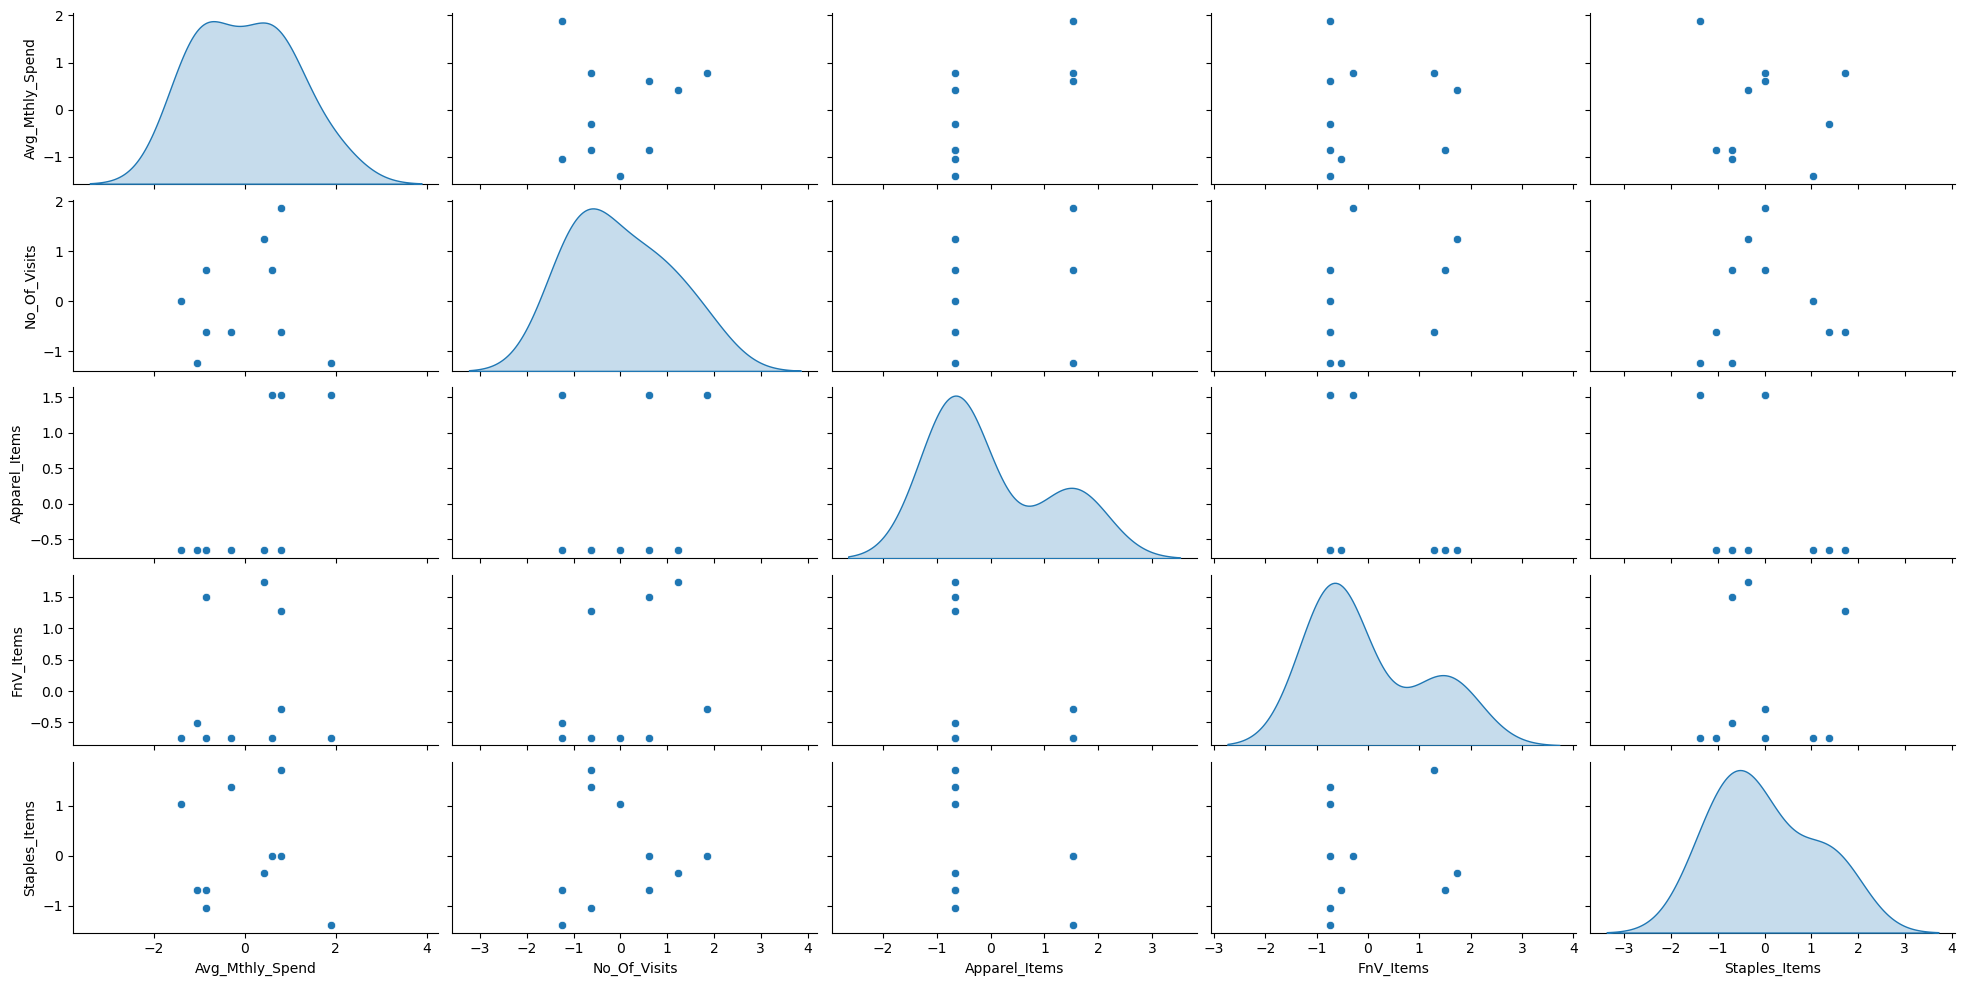

In [10]:
sns.pairplot(dataScaled,height=2, aspect=2, diag_kind='kde')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
model = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='euclidean')
model

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [17]:
model.fit(dataScaled)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [19]:
data_Attr['clusters'] = model.labels_
data_Attr

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,clusters
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [22]:
data_Attr[data_Attr['clusters'] == 0]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,clusters
0,10000,2,1,1,0,0
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0


In [24]:
data_Attr[data_Attr['clusters'] == 1]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,clusters
1,7000,3,0,10,9,1
4,6000,6,0,12,3,1
6,2500,5,0,11,2,1


In [27]:
dataClust = data_Attr.groupby(['clusters'])

In [29]:
dataClust.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
clusters,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [32]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [34]:
z = linkage(dataScaled, metric='euclidean', method = 'average')


In [36]:
c, coph_dists = cophenet(z, pdist(dataScaled)) # z == Dendigram distance, pdist(DataScaled) == euclidean distance
c

0.8681149436293064

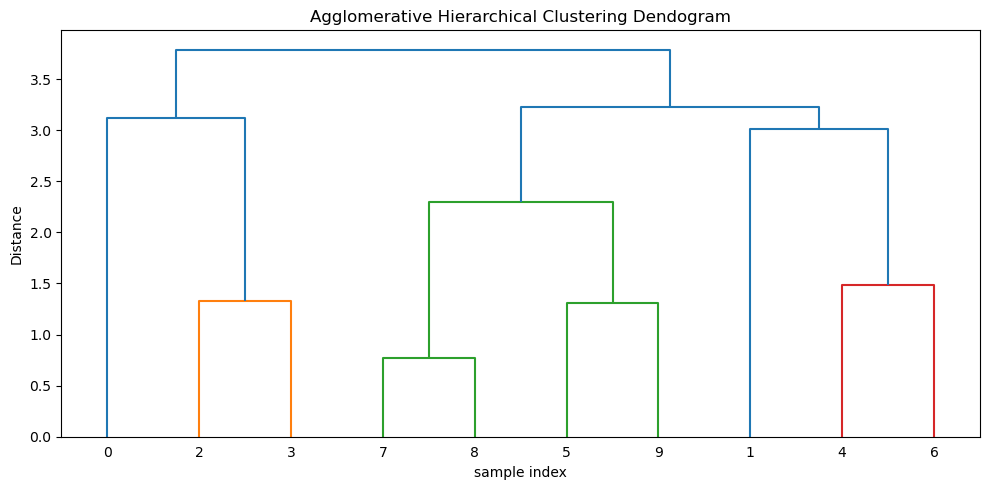

In [39]:
plt.figure(figsize=(10,5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z, leaf_font_size=10)
plt.tight_layout()